In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive/Colab Notebooks/Paddy Segmentation'

/content/drive/My Drive/Colab Notebooks/Paddy Segmentation


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import BatchNormalization

from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import random

Using TensorFlow backend.


In [4]:
df = np.array(pd.read_csv('Input/input_model.csv'))
print(df)

[[   0 1128 1153  762 3199    1]
 [   1 1116 1106  711 3222    1]
 [   2 1214 1173 1013 1498    1]
 ...
 [4784 1247 1172 1043 2334    2]
 [4785 1228 1235 1034 2564    2]
 [4786 1221 1165 1061 2109    2]]


In [5]:
g = np.random.permutation(df)
print(g)

[[3601 1275 1259 1083 2107    2]
 [1158 1040  975  604 2739    1]
 [1057 1043  987  596 3351    1]
 ...
 [  83 1109 1107  736 2169    1]
 [1754 1124 1030  755 1501    1]
 [3057 1080 1072  657 3076    1]]


In [0]:
x_train = g[:3000,1:5]
y_train = g[:3000,5]
x_val = g[3000:4000, 1:5]
y_val = g[3000:4000, 5]

x_test = g[4000:,1:5]
y_test = g[4000:,5]

In [7]:
encoder =  LabelEncoder()
# print(y_train)
y1 = encoder.fit_transform(y_train)
# print(y1)
print(y1.shape)
Y_train = pd.get_dummies(y1).values
# print(Y)
print(Y_train.shape)

y2 = encoder.fit_transform(y_val)
# print(y2)
print(y2.shape)
Y_val = pd.get_dummies(y2).values
# print(Y_val)
print(Y_val.shape)

# print(y_test)
y3= encoder.fit_transform(y_test)
# print(y3)
print(y3.shape)
Y_test = pd.get_dummies(y3).values
# print(Y_test)
print(Y_test.shape)

(3000,)
(3000, 2)
(1000,)
(1000, 2)
(787,)
(787, 2)


In [8]:
model = Sequential()
model.add(Dense(32, input_shape=(4,)))
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=1e-4,decay=1e-7),'binary_crossentropy', ['accuracy'])
model.summary()







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64)                256       
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 7,074


In [9]:
H = model.fit(x_train, Y_train, epochs = 100, validation_data = (x_val, Y_val))




Train on 3000 samples, validate on 1000 samples
Epoch 1/100





3000/3000 [==============================] - 6s 2ms/step - loss: 0.3988 - acc: 0.8357 - val_loss: 0.2808 - val_acc: 0.9215
Epoch 2/100
3000/3000 [==============================] - 1s 342us/step - loss: 0.2295 - acc: 0.9232 - val_loss: 0.2796 - val_acc: 0.8845
Epoch 3/100
3000/3000 [==============================] - 1s 361us/step - loss: 0.1765 - acc: 0.9440 - val_loss: 0.1892 - val_acc: 0.9435
Epoch 4/100
3000/3000 [==============================] - 1s 328us/step - loss: 0.1512 - acc: 0.9502 - val_loss: 0.2296 - val_acc: 0.9100
Epoch 5/100
3000/3000 [==============================] - 1s 365us/step - loss: 0.1368 - acc: 0.9525 - val_loss: 0.2342 - val_acc: 0.9075
Epoch 6/100
3000/3000 [==============================] - 1s 327us/step - loss: 0.1326 - acc: 0.9515 - val_loss: 0.1550 - val_acc: 0.9500
Epoch 7/100
3000/3000 [==============================] - 1s 337us/step - loss: 0.1230 - acc: 0.9582 - val_loss: 0.1409 - val

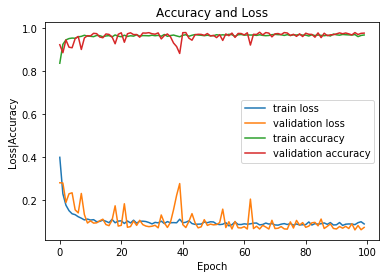

In [10]:
import matplotlib.pyplot as plt

fig = plt.figure()
numOfEpoch = 100
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='train loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H.history['acc'], label='train accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_acc'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [11]:
scores = model.evaluate(x_test, Y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

787/787 [==============================] - 0s 85us/step
Test loss: 0.057698420889135994
Test accuracy: 0.9809402795425667


In [0]:
model.save('Model/model_weight_paddy.h5')